# **CLASIFICADOR DE PERROS Y GATOS 🐶🐱**

**NOMBRE: ARACELY NICOLL DUEÑAS CONDORI**

In [15]:
# Descargar y descomprimir el dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2025-09-30 12:23:57--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.212.207, 172.217.204.207, 172.217.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.212.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   201MB/s    in 0.3s    

2025-09-30 12:23:58 (201 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [16]:
# Cargar datasets de entrenamiento y validación
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

batch_size = 32
img_size = (180, 180)

train_dataset = image_dataset_from_directory(
    '/tmp/cats_and_dogs_filtered/train',
    shuffle=True,
    batch_size=batch_size,
    image_size=img_size
)

validation_dataset = image_dataset_from_directory(
    '/tmp/cats_and_dogs_filtered/validation',
    shuffle=True,
    batch_size=batch_size,
    image_size=img_size
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


Clases encontradas: ['cats', 'dogs']


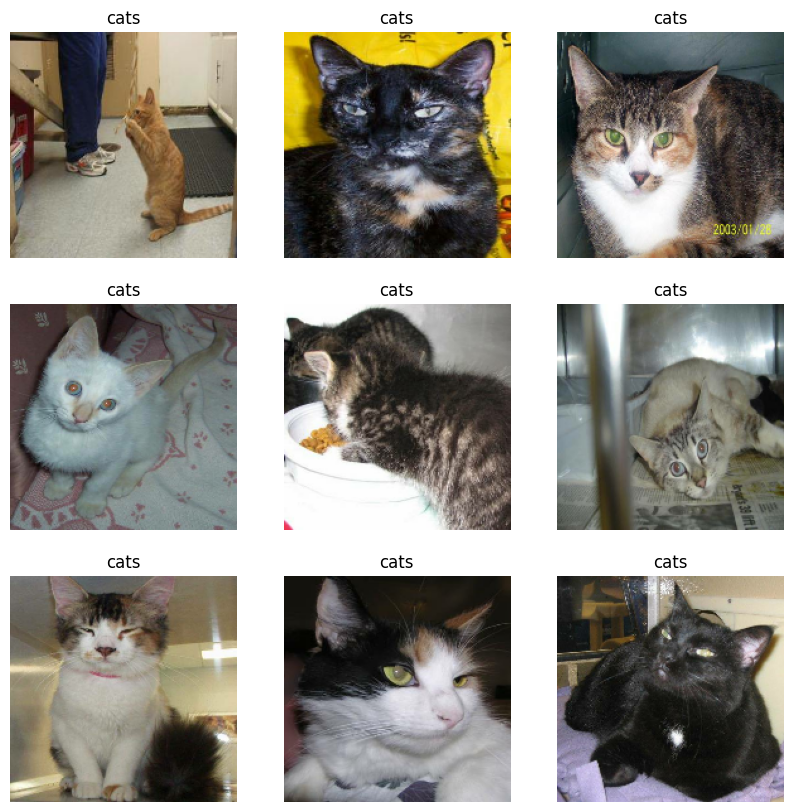

In [17]:
# Visualizar algunas imágenes
import matplotlib.pyplot as plt

class_names = train_dataset.class_names
print("Clases encontradas:", class_names)

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [18]:
# Aumentación y normalización de datos
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

normalization_layer = layers.Rescaling(1./255)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_ds = validation_dataset.prefetch(buffer_size=AUTOTUNE)

In [19]:
# Modelo CNN
from tensorflow.keras import models

def make_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        data_augmentation,
        normalization_layer,

        layers.Conv2D(32, 3, activation='relu'),
        layers.MaxPooling2D(),

        layers.Conv2D(64, 3, activation='relu'),
        layers.MaxPooling2D(),

        layers.Conv2D(128, 3, activation='relu'),
        layers.MaxPooling2D(),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model = make_model(input_shape=(180, 180, 3), num_classes=2)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,647,234 (25.36 MB)

 Trainable params: 6,647,234 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Compilar y entrenar
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15
)

Epoch 1/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 168s 3s/step - accuracy: 0.5283 - loss: 0.9041 - val_accuracy: 0.5510 - val_loss: 0.6906
Epoch 2/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 163s 3s/step - accuracy: 0.5322 - loss: 0.6926 - val_accuracy: 0.5000 - val_loss: 0.6914
Epoch 3/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - accuracy: 0.5129 - loss: 0.6909 - val_accuracy: 0.5730 - val_loss: 0.6831
Epoch 4/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 164s 3s/step - accuracy: 0.5824 - loss: 0.6772 - val_accuracy: 0.6510 - val_loss: 0.6400
Epoch 5/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 161s 3s/step - accuracy: 0.6287 - loss: 0.6490 - val_accuracy: 0.6560 - val_loss: 0.6098
Epoch 6/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 161s 3s/step - accuracy: 0.6345 - loss: 0.6585 - val_accuracy: 0.6330 - val_loss: 0.6433
Epoch 7/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 161s 3s/step - accuracy: 0.6664 - loss: 0.6304 - val_accuracy: 0.6830 - val_loss: 0.5925
Epoch 8/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - accuracy: 0.6791 - loss: 0.6071 - val_accuracy: 0.6970 - v

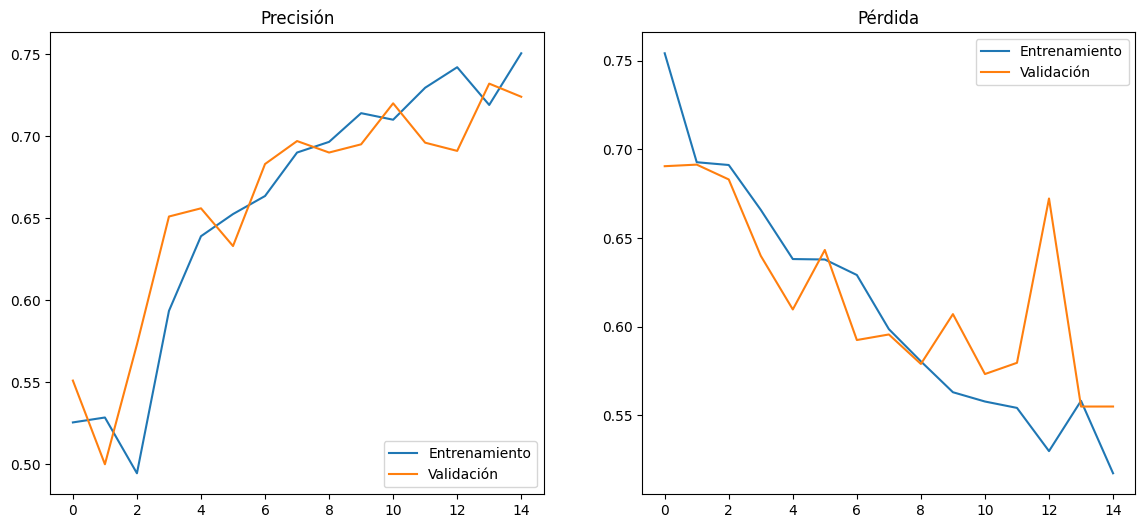

In [21]:
# Curvas de entrenamiento
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Entrenamiento')
plt.plot(epochs_range, val_acc, label='Validación')
plt.legend(loc='lower right')
plt.title('Precisión')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Entrenamiento')
plt.plot(epochs_range, val_loss, label='Validación')
plt.legend(loc='upper right')
plt.title('Pérdida')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


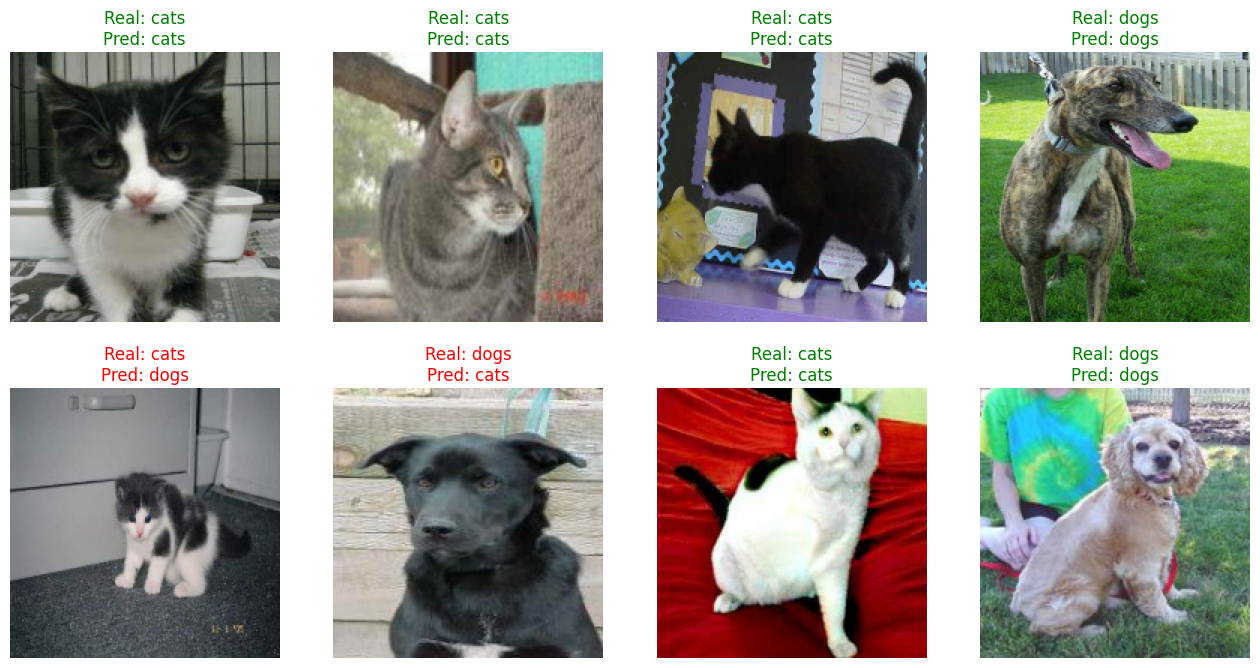

In [22]:
# Predicción sobre 4 gatos y 4 perros
import numpy as np

for images, labels in validation_dataset.take(1):
    predictions = model.predict(images[:8])
    predicted_classes = tf.argmax(predictions, axis=1)

    plt.figure(figsize=(16, 8))
    for i in range(8):
        ax = plt.subplot(2, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        pred_label = class_names[predicted_classes[i]]
        true_label = class_names[labels[i]]
        color = "green" if pred_label == true_label else "red"
        plt.title(f"Real: {true_label}\nPred: {pred_label}", color=color)
        plt.axis("off")